In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

np.random.seed(1234)

In [2]:
TEST_PREDICTIONS_FILENAME = "./resnext50_140crop_aug_30ep_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [3]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [4]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 99819
Landmarks shape: (99819, 971, 2)


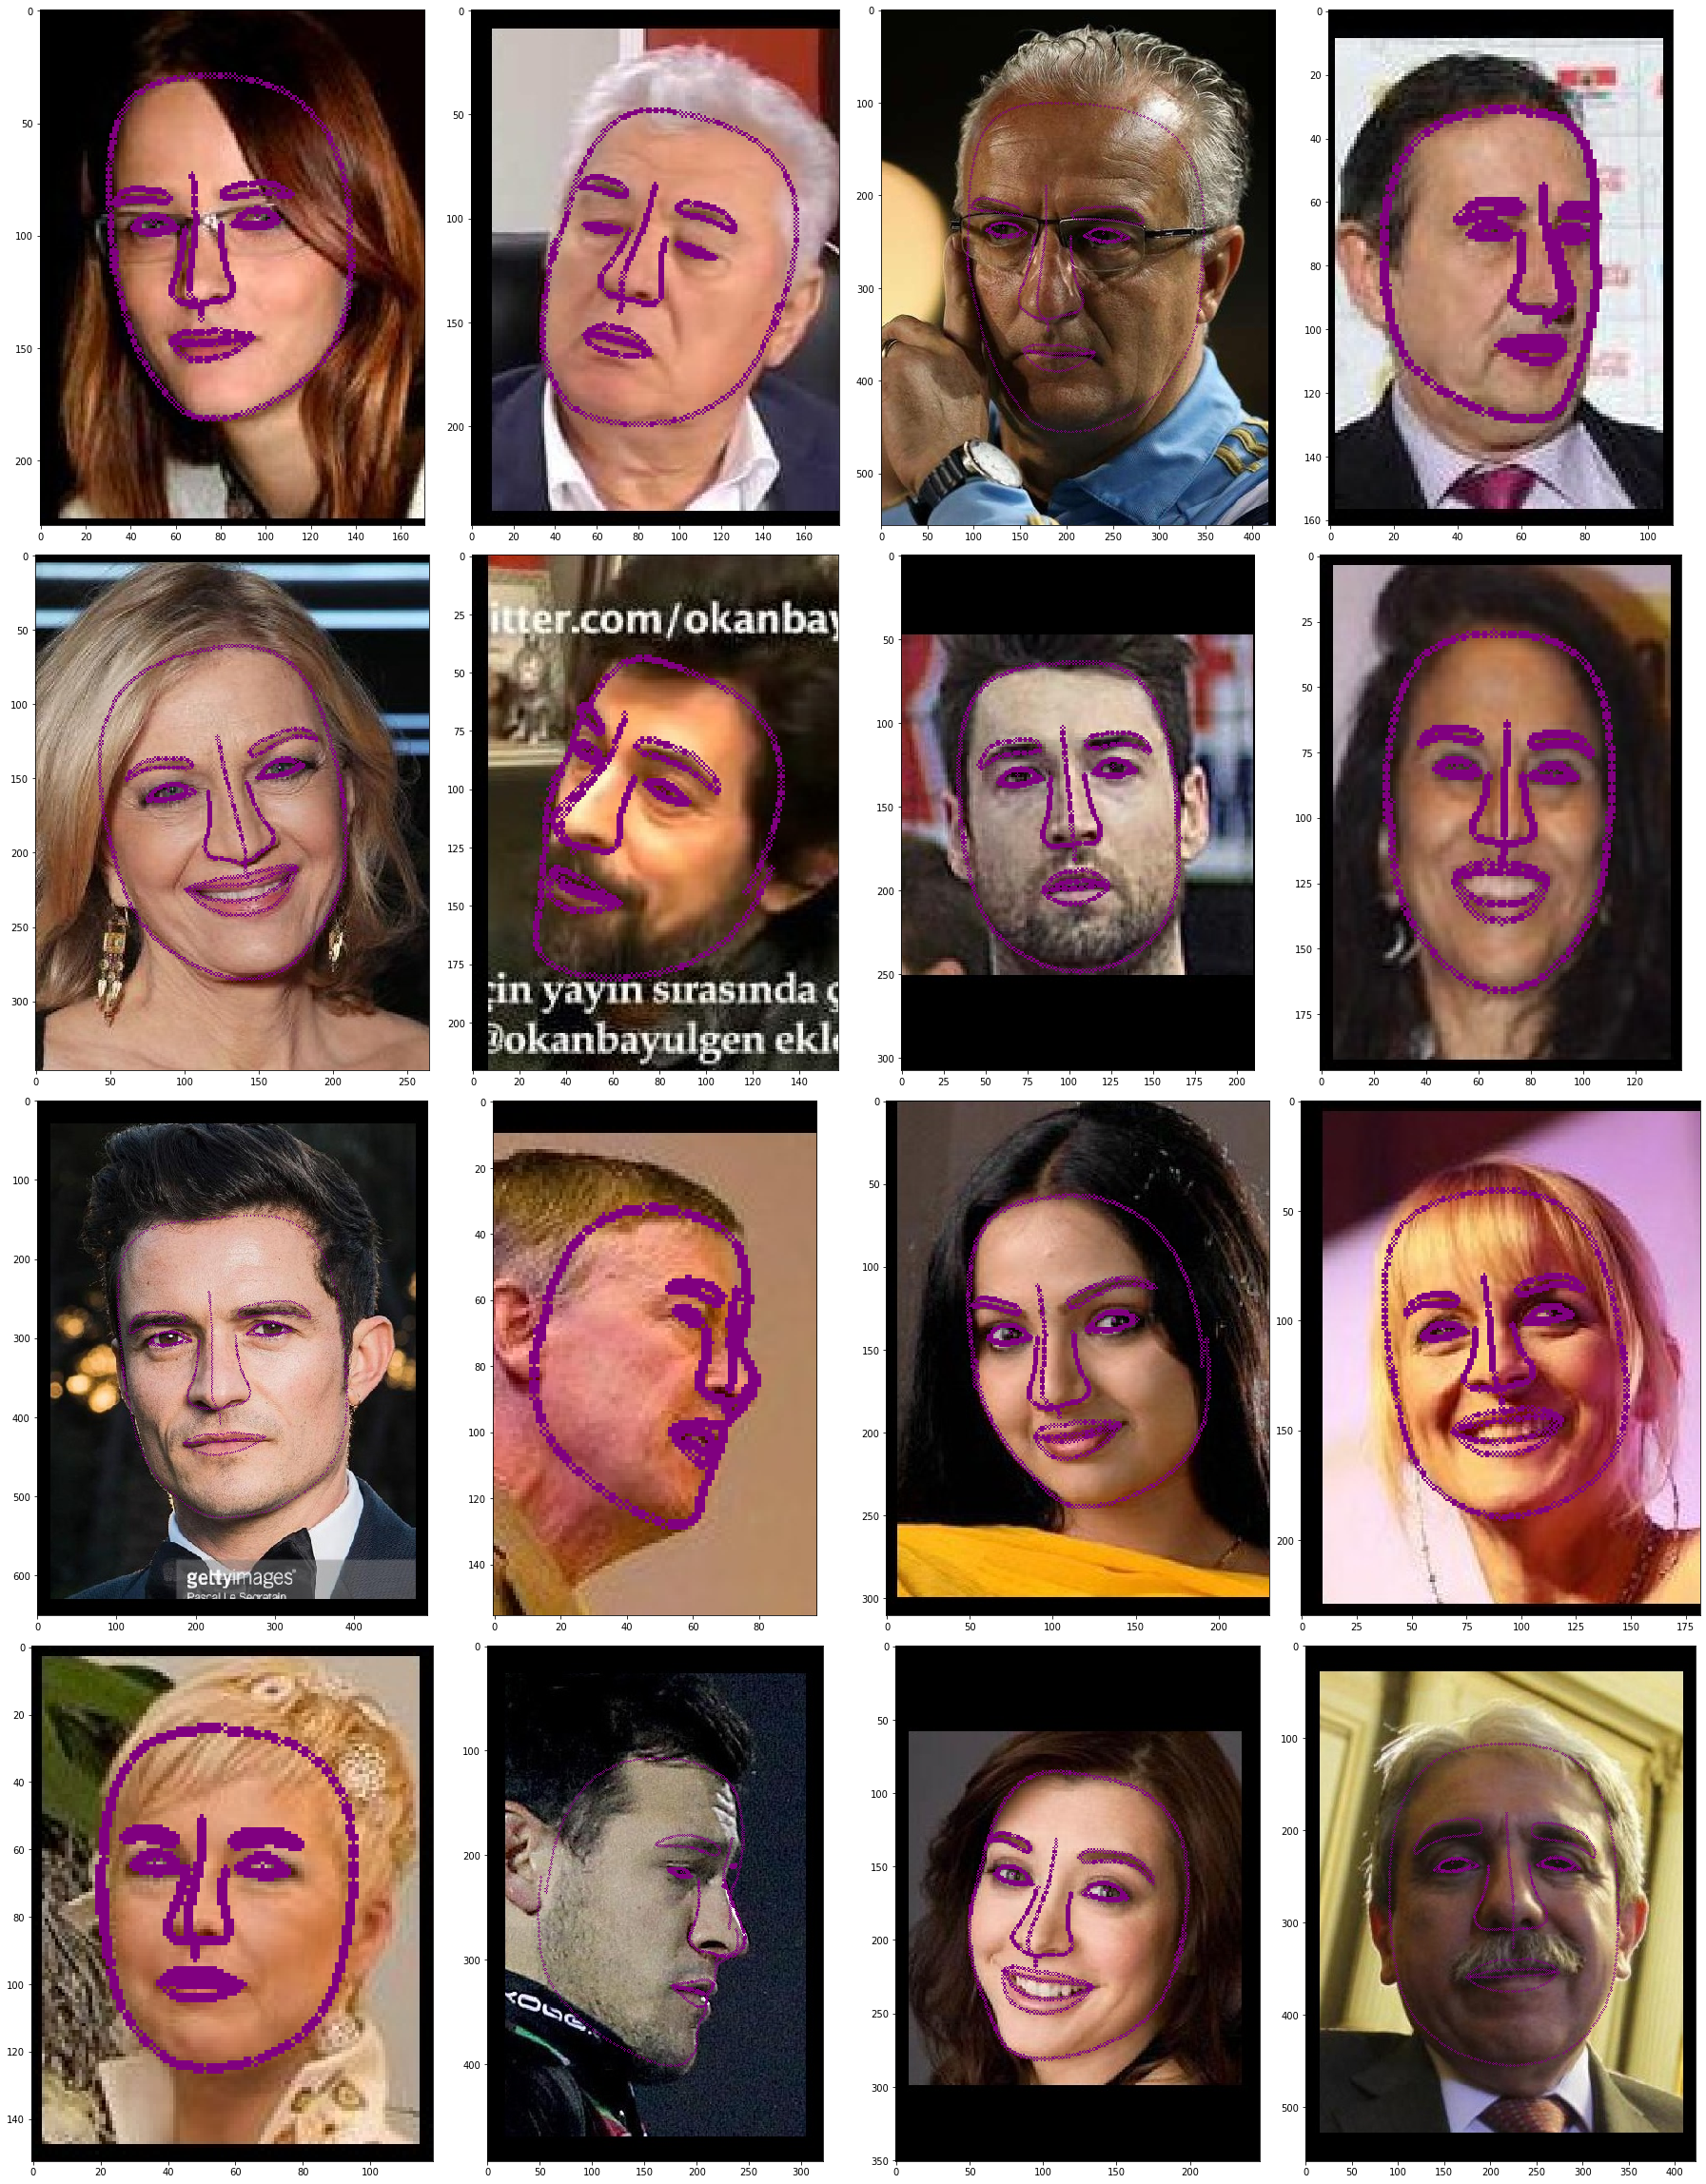

In [21]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

In [6]:
results.keys()

dict_keys(['image_names', 'landmarks'])

In [7]:
df = pd.DataFrame(results['landmarks'].reshape((99819, 1942)))
df['image'] = results['image_names']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1933,1934,1935,1936,1937,1938,1939,1940,1941,image
0,57.230659,119.635056,56.244701,119.654251,55.220104,119.629532,54.180565,119.607018,53.204418,119.501610,...,93.541641,44.629326,93.386696,44.593822,93.207909,39.845863,62.336891,69.031189,60.306335,data\test\images\c59b2834147079f3e34627f1e7565...
1,100.222511,237.461594,98.424026,237.133224,96.578743,236.660583,94.785995,236.075012,93.234322,235.289856,...,177.482468,78.177620,175.843781,78.033768,174.950409,73.953392,119.001205,126.776642,117.214996,data\test\images\85629eb20fdbbb98d0ee20ed9f3ba...
2,152.033798,322.738464,149.320969,322.859497,146.524384,322.803253,143.736725,322.763214,141.085724,322.398773,...,264.467529,122.428154,264.303223,122.434875,263.922668,100.427284,177.742523,172.694931,169.575790,data\test\images\4df0124462ce32e0e8dd5d96a7d64...
3,58.741196,152.866852,57.464298,152.836838,56.137676,152.736557,54.835918,152.629852,53.606297,152.400848,...,116.390350,43.655670,115.920052,43.660648,115.661942,42.166378,80.598213,78.563583,80.309250,data\test\images\fca085b03b834d9d94170e8f14532...
4,69.813683,151.038300,68.598114,150.894012,67.310791,150.659027,66.057655,150.410202,64.905510,150.005554,...,117.205803,56.833149,117.024673,56.743378,116.834740,52.690010,72.829735,90.542328,71.757561,data\test\images\67b598c8621b1f7135dfbc1c47fe2...


In [15]:
df[2].min()

12.531946182250977